In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/retail_store_inventory.csv")

data.head()



,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


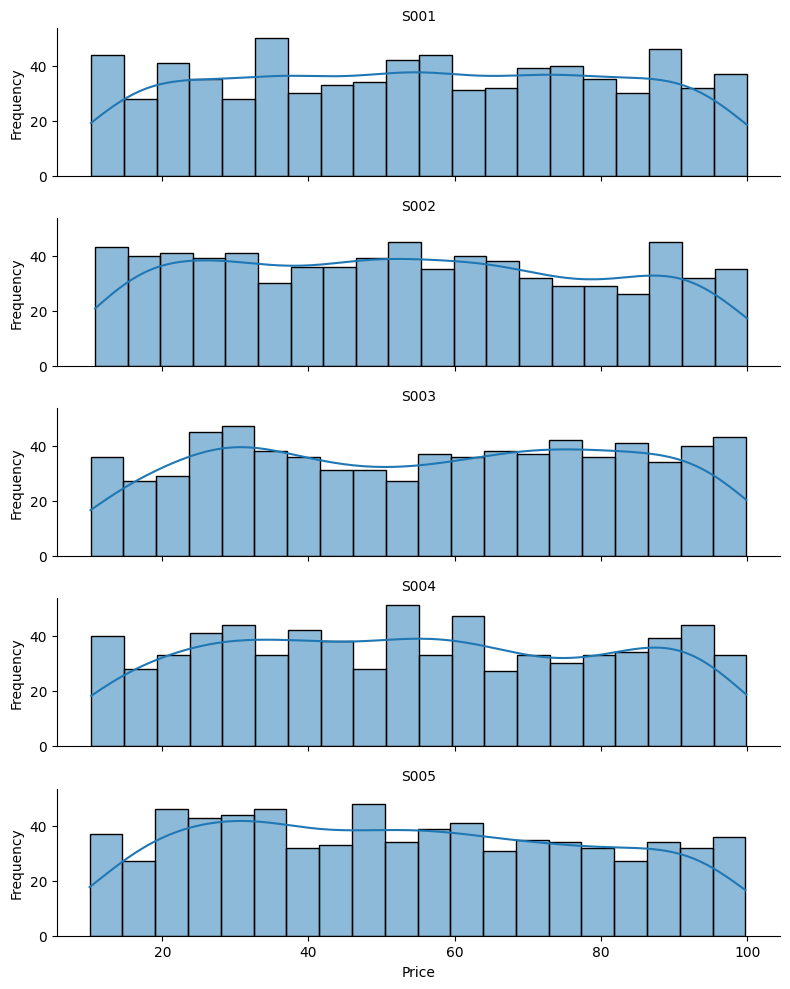

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter data for Product ID "P0001"
product_data_p0001 = product_data[product_data["Product ID"] == "P0001"]

# Create a FacetGrid to plot histograms by store
g = sns.FacetGrid(product_data_p0001, row="Store ID", height=2, aspect=4)
g.map(sns.histplot, "Price", bins=20, kde=True)

# Set titles and labels
g.set_titles(row_template="{row_name}")
g.set_axis_labels("Price", "Frequency")

plt.show()

In [24]:
data_reduced = data[
    (data["Product ID"] == "P0001")
]

# data_reduced = data.copy()

# fig, ax = plt.subplots(1,1 , figsize=(15, 5))

# ax.plot(data_sample["Date"], data_sample["Units Sold"])
len(data_reduced)

3655

In [32]:
data_sample = data_reduced.copy()

data_sample.loc[:, "day_of_week"] = pd.to_datetime(data_sample["Date"]).dt.dayofweek
data_sample.loc[:, "month"] = pd.to_datetime(data_sample["Date"]).dt.month
data_sample.loc[:, "day_of_month"] = pd.to_datetime(data_sample["Date"]).dt.day

data_sample.loc[:, "competitor_price_ratio"] = data_sample["Price"] / data_sample["Competitor Pricing"]

data_sample = pd.get_dummies(data_sample, columns=["Weather Condition", "Holiday/Promotion", "Seasonality", "Store ID"])
data_sample.drop(["Region", "Product ID", "Category", "Demand Forecast", "Date"], axis=1, inplace=True)

for lag in range(1, 28):
    data_sample[f"Units_Sold_Lag_{lag}"] = data_sample["Units Sold"].shift(lag)
data_sample.dropna(inplace=True)

data_sample.head()
len(data_sample)

3628

In [30]:
data_sample.columns

Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Competitor Pricing', 'day_of_week', 'month', 'day_of_month',
       'Weather Condition_Cloudy', 'Weather Condition_Rainy',
       'Weather Condition_Snowy', 'Weather Condition_Sunny',
       'Holiday/Promotion_0', 'Holiday/Promotion_1', 'Seasonality_Autumn',
       'Seasonality_Spring', 'Seasonality_Summer', 'Seasonality_Winter',
       'Store ID_S001', 'Store ID_S002', 'Store ID_S003', 'Store ID_S004',
       'Store ID_S005', 'Units_Sold_Lag_1', 'Units_Sold_Lag_2',
       'Units_Sold_Lag_3', 'Units_Sold_Lag_4', 'Units_Sold_Lag_5',
       'Units_Sold_Lag_6', 'Units_Sold_Lag_7', 'Units_Sold_Lag_8',
       'Units_Sold_Lag_9', 'Units_Sold_Lag_10', 'Units_Sold_Lag_11',
       'Units_Sold_Lag_12', 'Units_Sold_Lag_13', 'Units_Sold_Lag_14',
       'Units_Sold_Lag_15', 'Units_Sold_Lag_16', 'Units_Sold_Lag_17',
       'Units_Sold_Lag_18', 'Units_Sold_Lag_19', 'Units_Sold_Lag_20',
       'Units_Sold_Lag_21', 'U

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X = data_sample.drop(["Units Sold"], axis=1)
y = data_sample["Units Sold"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X.iloc[:int(len(X)*0.8), :]
X_test = X.iloc[int(len(X)*0.8):, :]

y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

model = RandomForestRegressor(n_estimators=1000, random_state=42, )
# model = GradientBoostingRegressor(n_estimators=10000, random_state=42, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, root_mean_squared_error

mean_squared_error(y_test, y_pred)

7251.177116837465

85.1538438171611

In [75]:
# Variable to predict: "Units Sold"
# Features: 'Date', 'Product ID', 'Store ID', 'Region', 'Inventory Level', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality',
# New features: 'day_of_week', 'month', 'day_of_month'
# Categorical features: 'Weather Condition', 'Holiday/Promotion', 'Seasonality', 'Product ID', 'Store ID', 'Region'
# Numerical features: 'Inventory Level', 'Price', 'Discount', 'Competitor Pricing'
# Drop: 'Product ID', 'Store ID' (Just for this example)

data_sample = data_reduced.copy()

data_sample.loc[:, "day_of_week"] = pd.to_datetime(data_sample["Date"]).dt.dayofweek
data_sample.loc[:, "month"] = pd.to_datetime(data_sample["Date"]).dt.month
data_sample.loc[:, "day_of_month"] = pd.to_datetime(data_sample["Date"]).dt.day

data_sample = pd.get_dummies(data_sample, columns=["Weather Condition", "Holiday/Promotion", "Seasonality", "Region", "Product ID", "Store ID", "Category"])
data_sample.drop(["Demand Forecast"], axis=1, inplace=True)

for lag in range(1, 28):
    data_sample[f"Units_Sold_Lag_{lag}"] = data_sample["Units Sold"].shift(lag)
data_sample.dropna(inplace=True)

data_sample.head()

,Date,Inventory Level,Units Sold,Units Ordered,Price,Discount,Competitor Pricing,day_of_week,month,day_of_month,...,Units_Sold_Lag_18,Units_Sold_Lag_19,Units_Sold_Lag_20,Units_Sold_Lag_21,Units_Sold_Lag_22,Units_Sold_Lag_23,Units_Sold_Lag_24,Units_Sold_Lag_25,Units_Sold_Lag_26,Units_Sold_Lag_27
27,2022-01-01,304,29,99,66.96,20,65.36,5,1,1,...,28.0,175.0,312.0,97.0,128.0,14.0,61.0,65.0,150.0,127.0
28,2022-01-01,113,9,84,81.29,5,82.06,5,1,1,...,150.0,28.0,175.0,312.0,97.0,128.0,14.0,61.0,65.0,150.0
29,2022-01-01,157,126,181,60.84,0,65.22,5,1,1,...,24.0,150.0,28.0,175.0,312.0,97.0,128.0,14.0,61.0,65.0
30,2022-01-01,67,13,33,34.62,0,33.98,5,1,1,...,42.0,24.0,150.0,28.0,175.0,312.0,97.0,128.0,14.0,61.0
31,2022-01-01,281,25,136,19.56,5,19.01,5,1,1,...,12.0,42.0,24.0,150.0,28.0,175.0,312.0,97.0,128.0,14.0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X = data_sample.drop(["Units Sold", "Date"], axis=1)
y = data_sample["Units Sold"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X.iloc[:int(len(X)*0.8), :]
X_test = X.iloc[int(len(X)*0.8):, :]

y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

model = RandomForestRegressor(n_estimators=1000, random_state=42, )
# model = GradientBoostingRegressor(n_estimators=10000, random_state=42, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

7744.555427468286

(136, 171, 171, 136, 171)

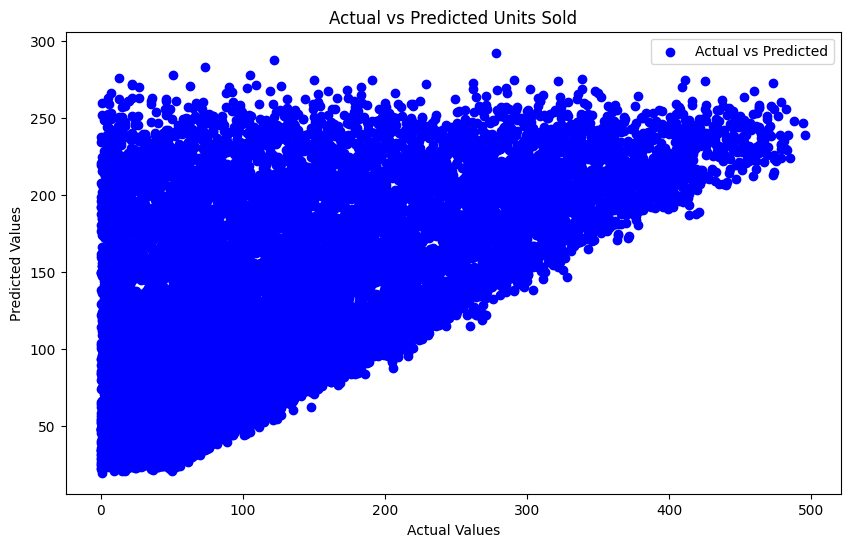

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Units Sold')
plt.legend()
plt.show()